# Important concepts on correlation
### A follow along guide from following youtube link - https://www.youtube.com/watch?v=DaBL4ZR5FSY&list=PLmPJQXJiMoUU52xCfjyoGRfoLCHKFtDxX&index=7

We will try to find the correlation between features and study their relationship with the help of Statistical Tests, making use of P-value

In [24]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We will use the Insurance dataset for our purpose

In [3]:
# Loading the dataset

data = pd.read_csv(r"C:\Users\parth\Python Jupyter Projects\Practice\ML\Dataset\insurance.csv")

In [4]:
# Checking the data
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Test for Normality

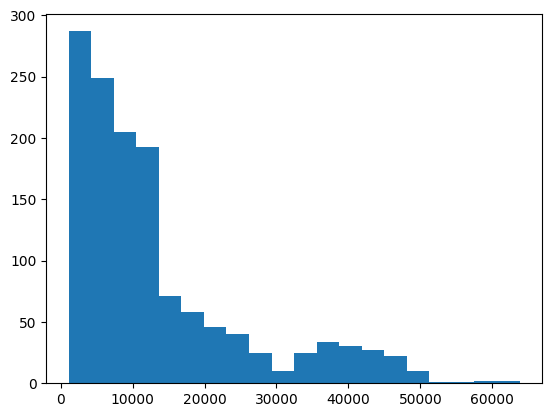

In [7]:
# Let us check if the value of the CHarges is normally distributed or not. 

plt.hist(data['charges'], bins=20)
plt.show()

In [8]:
# Visually it clear that is not a normal distribution. Let use use a statistical test to prove it
from scipy.stats import shapiro

**The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.** *The **null hypothesis** of Shapiro's test is that the **population is distributed normally.***

In [10]:
stat, p = shapiro(data['charges'])

In [19]:
print("stat -%.5f"%stat)

stat -0.81469


In [18]:
print("p value -%.5f"%p)

p value -0.00000


As p-value is less than 0.05, we can reject the Null Hypothesis. And hence accept the alternate hypothesis, which is that the distribution is not normal

## Now we will check for correlation between the catergorical and continuous variables


###  Pandas Correlation function allows for easy calculation of correlation between the continuous variables.


By default, it uses the pearson coefficient. Here +1 and -1 signify high correlation between two variables. Pearson correlation assumes linear relationship between variables.

In [23]:
corr = data.corr(method = 'pearson')

C:\Users\parth\AppData\Local\Temp\ipykernel_3076\445970717.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr(method = 'pearson')


In [26]:
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot: >

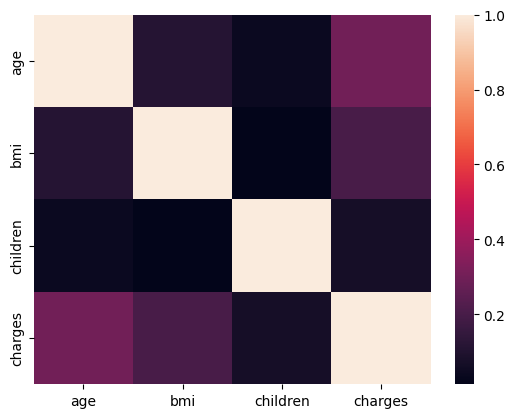

In [25]:
sns.heatmap(corr)

**We can see that the continuous variables of our dataset - charges, children, bmi and age, are not correlated**

In [28]:
data.corr(method = 'spearman')

C:\Users\parth\AppData\Local\Temp\ipykernel_3076\1167604356.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method = 'spearman')


,age,bmi,children,charges
age,1.000000,0.107736,0.056992,0.534392
bmi,0.107736,1.000000,0.015607,0.119396
children,0.056992,0.015607,1.000000,0.133339
charges,0.534392,0.119396,0.133339,1.000000


In [32]:
# Another method to calculate the correlation is through the scipy library
from scipy.stats import spearmanr

# Lets find the correlation between age and bmi
stat, p = spearmanr(data['age'], data['bmi'])

In [33]:
print("%.5f"%stat)

0.10774


In [34]:
print("p value -%.5f"%p)

p value -0.00008


As p-value is less than 5% we can reject null hypothesis that the two features are correlated

### Study of Correlation between categorical features

The scipy library's chi-square test can be use to find whether two categorical variables are independent or dependent. The Null Hypothesis states that the two variables are independent where as the alternate hypothesis implies that they are dependent. Few pre-requisites for conducting this test are - need to build a contigency table(a cross table representing summary stats of the categorical features in consideration), size of each contigency > 25. Additional info at- https://www.geeksforgeeks.org/python-pearsons-chi-square-test/

In [43]:
contingency_data = pd.crosstab(data['sex'], data['smoker'],margins = False)

In [44]:
contingency_data

smoker,no,yes
sex,,
female,547,115
male,517,159


In [45]:
# Importing required module
from scipy.stats import chi2_contingency

In [46]:
stat, p, dof, expected = chi2_contingency(contingency_data)

In [47]:
print("%.5f"%stat)

7.39291


In [48]:
print("p value -%.5f"%p)

p value -0.00655


As p-value is less than 5% we can reject null hypothesis that the two features are correlated